In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [10]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [92]:
# 1. frequency table for the column "category" with the five most listed categories

frequency_table_category = df.category.value_counts()
frequency_table_category = frequency_table_category.reset_index().sort_values("count", ascending=False)[:5]
frequency_table_category

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978


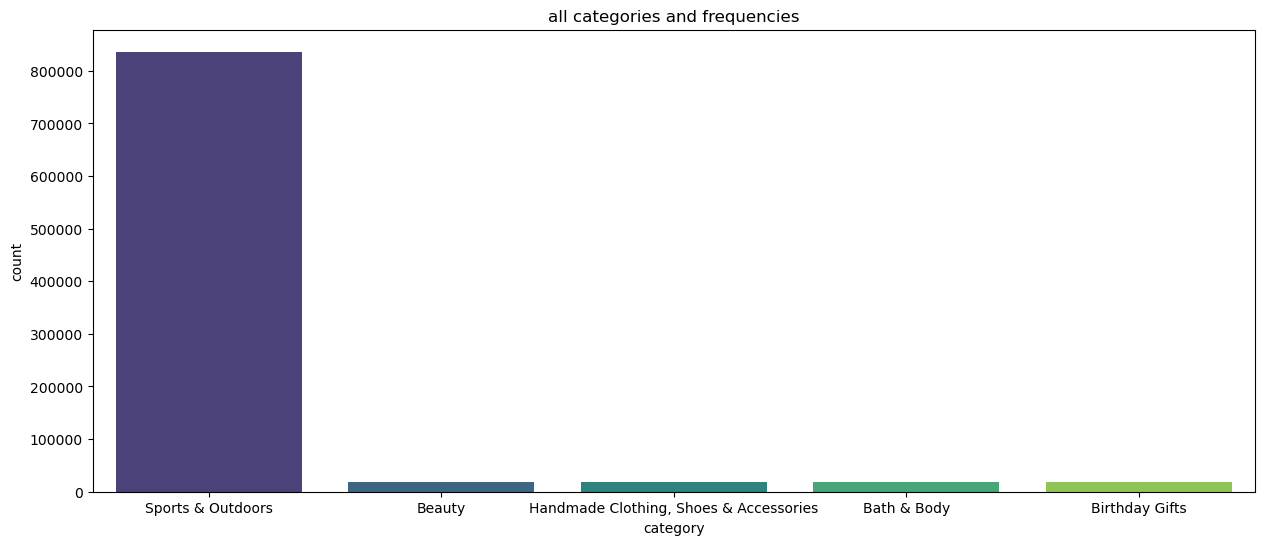

In [82]:
# 2. visualization: bar chart
# for top five categories (almost 300 nunique are not useful for a bar chart)

plt.figure(figsize=(15, 6))
sns.barplot(
    x='category',
    y='count',
    data=frequency_table_category,
    palette='viridis',
)
plt.title('all categories and frequencies')
plt.show()

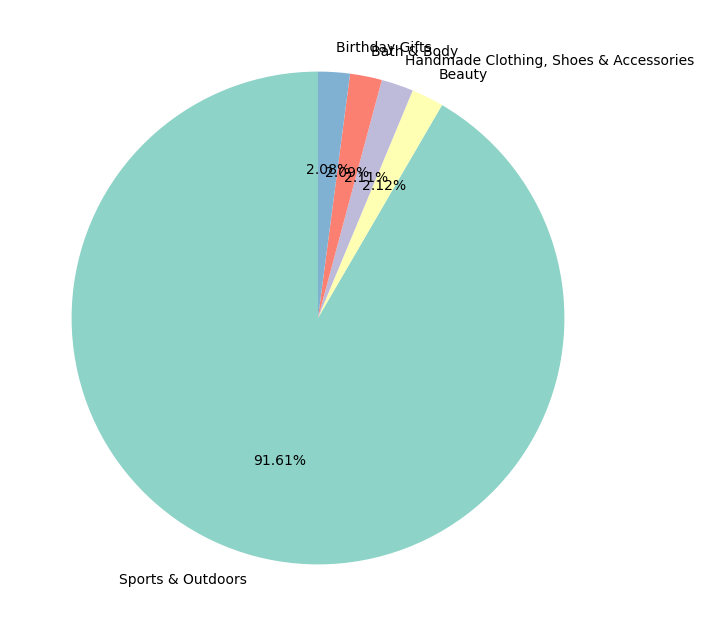

In [108]:
# 2. visualization: pie chart
# for top 5 categories

labels = frequency_table_category['category']
values = frequency_table_category['count']

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=90, colors=sns.color_palette('Set3'))

plt.show()

***Insights***:
both carts show that the category "Sports & Outdoors" dominates the listings by far

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [135]:
df.price.describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [137]:
df.price.mode()

0    9.99
Name: price, dtype: float64

**Insights**:
- The average price of the listed products is £89.24, the mode is much lower with £9.99 and also the median is lower with £19.09.
- The much higher mean points to the existence of outliers.
- The mode at £9.99 shows that the most products.

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [139]:
# range, min, max
# as the min is 0, the range == max which is £100,000
df.price.max() - df.price.min()

100000.0

In [147]:
# std, variance
# the std is 345.61 and the variance with 119,445 is the square of the std
round(df.price.var(), 0)

119445.0

**Insights**:
- the range of all the prices is £100,000 (equals the max, the min is 0)
- the std is £345.61 (and the variance with 119,445 is the square of the std). The relatively high std indicates that the prices spread significantly.
- the interquartile range is between £9.99 (25%) and £45.99 (75%) which means the 50% of the prices are within this range.

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

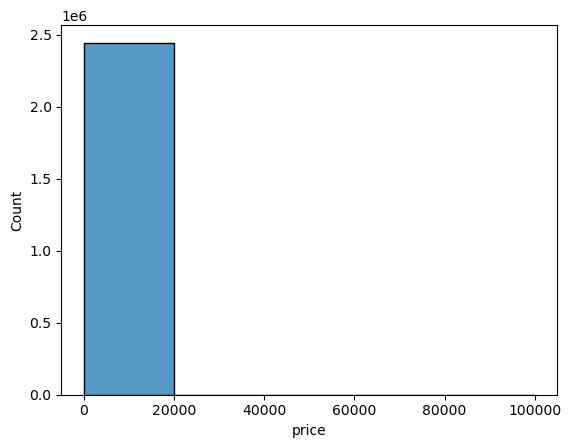

In [175]:
sns.histplot(df.price, bins=5)
plt.show()

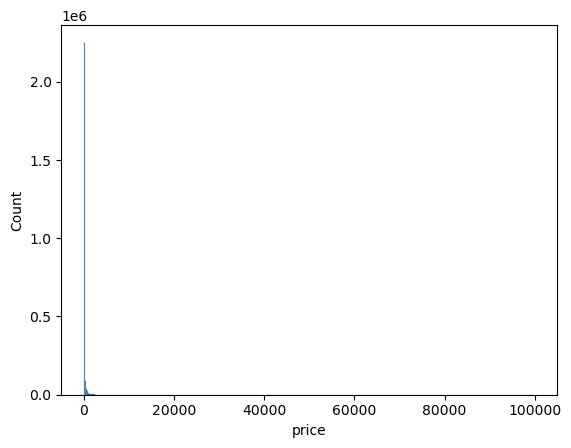

In [257]:
sns.histplot(df.price, bins=500)
plt.show()

**Insights**:
The histogram is not very helpful in this case because most prices are ~ between £0 - £10,000 but  there is a long tail to the right side (showing that the prices are positively skewed. By adding more bins, this becomes clearer.
It can be solved by excluding the extreme data and only analyzing a subset/ analyse both subsets independently (I do the first in the boxplot). Apart from that, I dont know what should be done.)

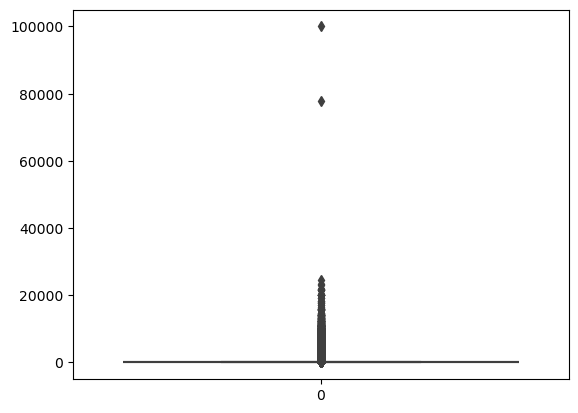

In [233]:
sns.boxplot(data=df.price)
plt.show()

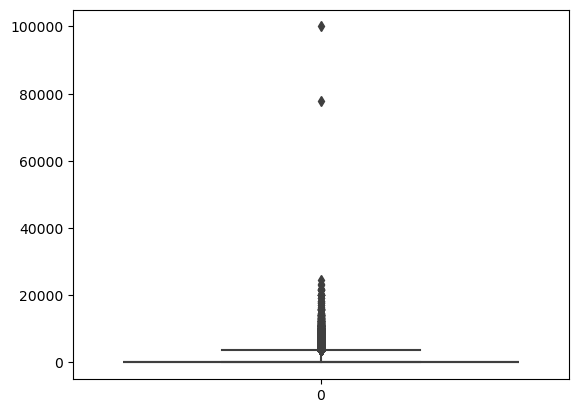

In [311]:
sns.boxplot(data=df.price, whis=100)
plt.show()

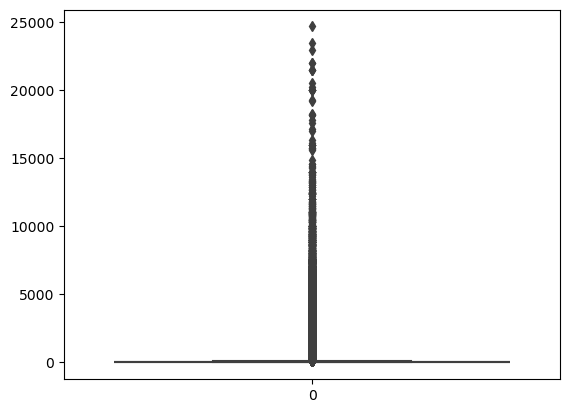

In [315]:
df_price_filtered_1 = df[df["price"] < 25000] 
sns.boxplot(data=df_price_filtered_1["price"], whis=1.5)
plt.show()

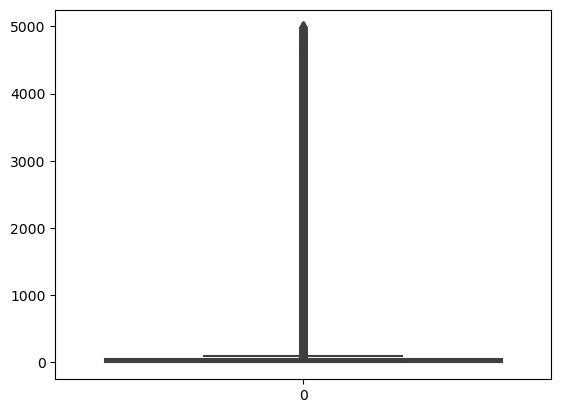

In [317]:
df_price_filtered_2 = df[df["price"] < 5000] 
sns.boxplot(data=df_price_filtered_2["price"], whis=1.5)
plt.show()

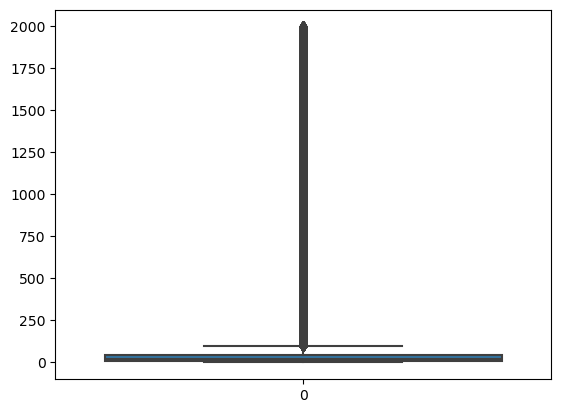

In [319]:
df_price_filtered_3 = df[df["price"] < 2000] 
sns.boxplot(data=df_price_filtered_3["price"], whis=1.5)
plt.show()

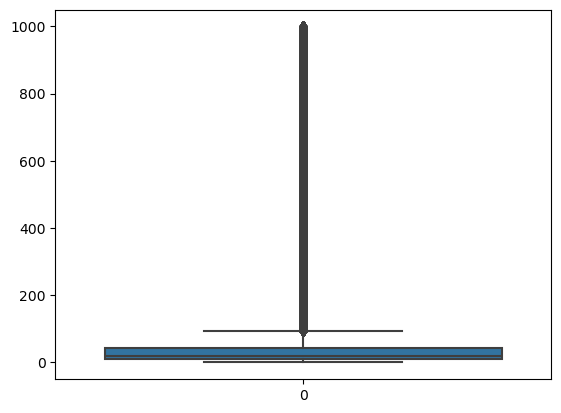

In [323]:
df_price_filtered_4 = df[df["price"] < 1000] 
sns.boxplot(data=df_price_filtered_4["price"], whis=1.5)
plt.show()

In [303]:
df_price_filtered_4.price.value_counts()

price
9.99      48922
12.99     38823
8.99      34058
7.99      33632
14.99     32570
          ...  
529.96        1
552.83        1
904.44        1
569.08        1
317.34        1
Name: count, Length: 58548, dtype: int64

In [287]:
df.price.value_counts()

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

In [325]:
df.price.skew().round(2)

27.49

In [327]:
df.price.kurtosis()

4241.616412866518

***Insights***:
The boxplot shows two very far outliers, one around £7,500 and one at £100,000 but there is also a very long tail to the right side, so the dispersion is (very) positively skewed (27.49). Also, the kurtosis value of 4241 shows that the distribution is far from normal distribution which a much sharper peak and more extreme values.
Only once the data for price was limited to <£2,000 one can see the idea of the box and only <£1,000 it is clear.

<Axes: ylabel='price'>

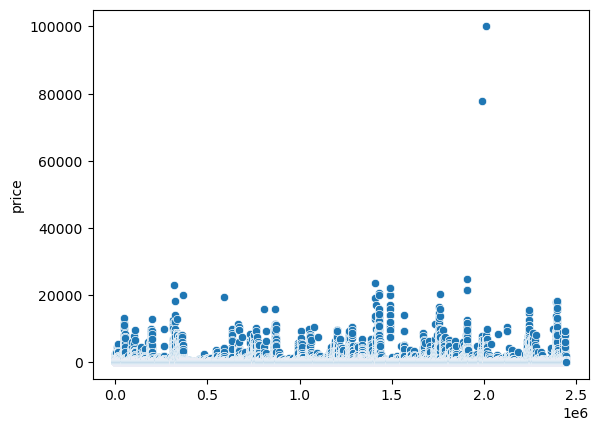

In [341]:
# additionally checking the scatterplot for better visualizations
sns.scatterplot(data=df.price)

<Axes: ylabel='price'>

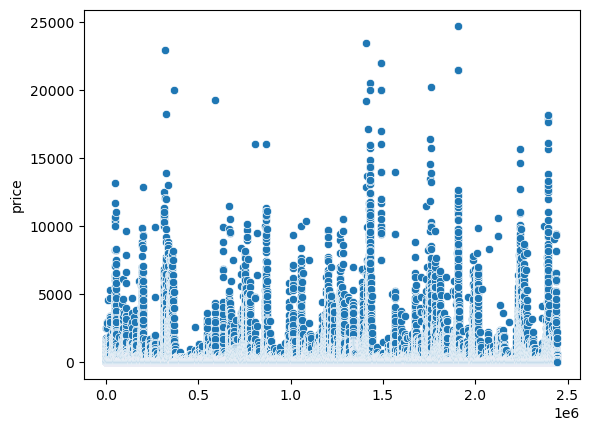

In [349]:
# additionally checking the scatterplot for better visualizations (with filter <25,000)
sns.scatterplot(data=df_price_filtered_1.price)

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [369]:
df.stars.describe().round(2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [375]:
df.stars.mode()

0    0.0
Name: stars, dtype: float64

***Insights***
- The mode is 0, so most customers either did not rate their product or gave it 0 stars; the median also is 0, so the majority of customers behaved like described for the mode; the mean is 2.15 stars, this is the average rating
- The common trend is not to rate the products (or give them zero stars), this depends on how the data was entered

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [407]:
df.stars.unique()

array([4.7, 4.6, 4.5, 4.8, 0. , 4.4, 4.3, 4.1, 4.9, 5. , 3.8, 3.6, 4. ,
       4.2, 3. , 3.9, 2.5, 3.4, 3.7, 3.2, 3.3, 3.5, 2.7, 2.1, 1. , 3.1,
       2. , 2.9, 2.8, 1.5, 2.2, 2.3, 2.6, 2.4, 1.4, 1.9, 1.8, 1.7, 1.6,
       1.2, 1.3, 1.1])

In [383]:
round(df.stars.var(), 2)

4.82

***Insights***
- The variance is 4.82; the std is 2.19; the interquartile range is between 0 (25%) and 4.4 (75%) stars which means the 50% of the stars are within this range.
- As the scale of the stars is only from 0 to 5, I would consider the variation rather high (std almost half the whole range)
- But if this (the relation to the scale) is not taken into account, the variation is not high

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [415]:
df.stars.skew().round(2)

0.08

In [419]:
df.stars.kurtosis().round(2)

-1.93

***Insights***
- The calculation of the skewness (0.08) shows that the distribution is almost a normal distribution with only a very (!) slight positive skew (so more lower ratings/ less stars).
- The kurtosis (-1.93) shows a more platykurtic distribution, so it is flatter than the normal distribution but the number is not very high. This indicates a broader distribution with a flatter peak.

In [351]:
df.sample(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2308543,2662118,B0B22S3FMK,PRO SIGNAL PSG03431 3.5mm Stereo Jack Plug to ...,0.0,0,7.31,False,0,Portable Sound & Video Products
502742,540108,B09LVD88MY,"FWfdhe Womens Winter Coats, Warm Plush Lined Z...",0.0,0,32.99,False,0,Sports & Outdoors


4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

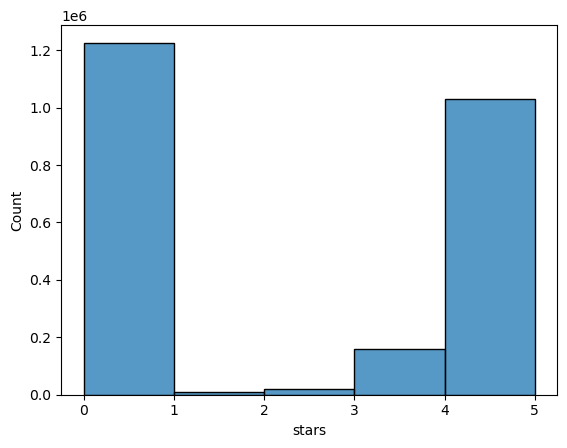

In [429]:
sns.histplot(df.stars, bins=5)
plt.show()

***Insights***
- The most common ratings are between 0-1 (we have seen before that 0 is the most common single rating)
- The second most common value range is between 4-5 stars
- The middle ratings between 1-4 is less common 